In [82]:
from tf_27.datasets import get_xor_dataset, get_iris_dataset
from tf_27.callbacks import ModelCallback
from IPython.display import clear_output
from tf_27.models import make_mlp_model
from tf_27.utils import get_hist_info
from matplotlib.pyplot import subplots
from pandas import DataFrame
from numpy import hstack
from time import time
import numpy as np

# DATASET XOR

In [91]:
l_results = get_xor_dataset( split = 0.3 , seed = 1 )
x_train , y_train , x_test , y_test , x_sample , y_sample = l_results

In [92]:
x_train.shape, y_test.shape

((280, 2), (120, 1))

## BATCH RANGE TRAINING

In [93]:
l_batches = list(range(1,10)) + list(range(10,100,5)) + list(range(100,200,10))

d_xor_settings = dict( n_inputs = 2 , n_outputs = 1 , n_hidden = 10, act_output = 'sigmoid' , loss = 'mean_squared_error' )

d_xor_hists = {}

TOTAL = len(l_batches)

for model_seed in range(1,11):
    d_xor_hists[model_seed] = { 'min_tr_loss' : [], 'min_te_loss' : [] , 'elapsed_time' : [] }
    for idx,batch in enumerate(l_batches,1):

        model = make_mlp_model( **d_xor_settings , seed = model_seed )
        start = time()
        clear_output(wait=True)
        print( f'Model Seed : [ {model_seed:2d} / 10 ] | Batch Size : [ {idx:02d} / {TOTAL} ] | XOR Model Batch => : {batch}' )

        hist = model.fit( 
            x = x_train ,
            y = y_train ,
            batch_size = batch ,
            epochs = 500 ,
            verbose = 0 ,
            validation_data = ( x_test , y_test ) ,
            callbacks = [ ModelCallback() ]
         );
        elapsed_time = time() - start
        min_tr_loss, min_te_loss , _ , _ = get_hist_info( hist.history )
        
        d_xor_hists[model_seed]['min_tr_loss'].append(min_tr_loss)
        d_xor_hists[model_seed]['min_te_loss'].append(min_te_loss)
        d_xor_hists[model_seed]['elapsed_time'].append(elapsed_time)

print( '\nXOR Model Trainings Finished!' )

Model Seed : [ 10 / 10 ] | Batch Size : [ 37 / 37 ] | XOR Model Batch => : 190

XOR Model Trainings Finished!


## PLOTING

In [94]:
m_min_tr_loss = []
m_min_te_loss = []
m_elapsed_time = []

for model_seed , d_values in d_xor_hists.items():
    l_min_tr_loss,l_min_te_loss,l_elapsed_time = d_values.values()
    m_min_tr_loss.append(l_min_tr_loss)
    m_min_te_loss.append(l_min_te_loss)
    m_elapsed_time.append(l_elapsed_time)
    
l_xor_min_tr_loss = np.array(m_min_tr_loss).mean(axis=0).tolist()
l_xor_min_te_loss = np.array(m_min_te_loss).mean(axis=0).tolist()
l_xor_elapsed_time = np.array(m_elapsed_time).mean(axis=0).tolist()

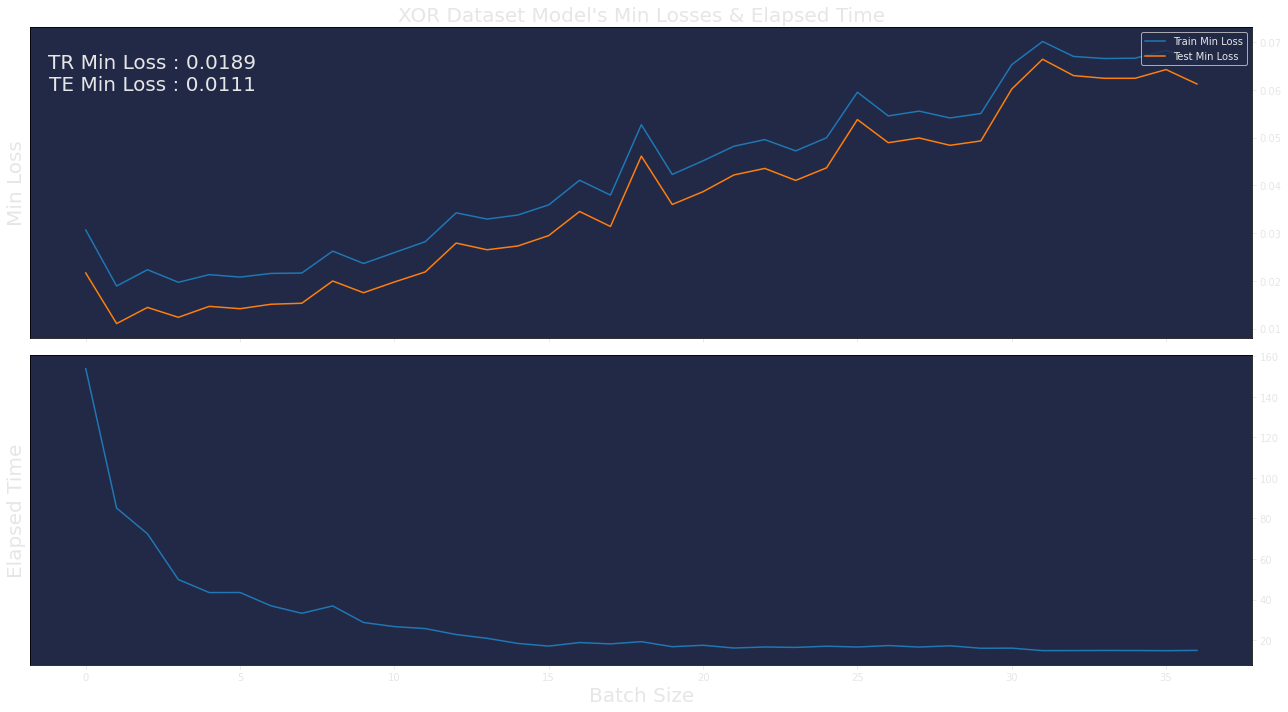

In [106]:
fig , (ax_1,ax_2) = subplots( 2, figsize = ( 18 , 10 ) , sharex = True )

ax_1.plot( l_xor_min_tr_loss )
ax_1.plot( l_xor_min_te_loss )
ax_1.set_title( 'XOR Dataset Model\'s Min Losses & Elapsed Time' , size = 20 )
ax_1.set_ylabel( 'Min Loss' , size = 20 )
d_text_args = dict( size = 20 , ha = 'center' , va = 'center' , transform = ax_1.transAxes ) 
ax_1.text( 0.1 , 0.85 , f'TR Min Loss : {min(l_xor_min_tr_loss):0.4f}\nTE Min Loss : {min(l_xor_min_te_loss):0.4f}' ,**d_text_args )
ax_1.legend( [ 'Train Min Loss' , 'Test Min Loss' ] , loc = 'upper right' )

ax_2.plot( l_xor_elapsed_time )
ax_2.set_ylabel( 'Elapsed Time' , size = 20 )
ax_2.set_xlabel( 'Batch Size' , size = 20 )

fig.tight_layout()
fig.savefig('xor_batch_plot.png')

# DATASET IRIS

In [49]:
x_train , y_train , x_test , y_test = get_iris_dataset(split=0.3, seed=1)
x_train.shape, y_test.shape

((105, 4), (45, 3))

## BATCH RANGE TRAINING

In [73]:
d_iris_settings = dict( n_inputs = 4 , n_outputs = 3 , n_hidden = 100, act_output = 'softmax' , loss = 'categorical_crossentropy' )

l_batches = list(range(1,10)) + list(range(10,110,5))

d_iris_hists = {}

TOTAL = len(l_batches)
for model_seed in range(1,11):
    d_iris_hists[model_seed] = { 'min_tr_loss' : [], 'min_te_loss' : [] , 'elapsed_time' : [] }
    for idx,batch in enumerate(l_batches,1):

        model = make_mlp_model( **d_iris_settings , seed = model_seed )
        start = time()
        clear_output(wait=True)
        print( f'Model Seed : [ {model_seed:2d} / 10 ] | Batch Size : [ {idx:02d} / {TOTAL} ] | Iris Model Batch => : {batch}' )

        hist = model.fit( 
            x = x_train ,
            y = y_train ,
            batch_size = batch ,
            epochs = 500 ,
            verbose = 0 ,
            validation_data = ( x_test , y_test ) ,
            callbacks = [ ModelCallback() ]
         );
        elapsed_time = time() - start
        min_tr_loss, min_te_loss , _ , _ = get_hist_info( hist.history )
        
        d_iris_hists[model_seed]['min_tr_loss'].append(min_tr_loss)
        d_iris_hists[model_seed]['min_te_loss'].append(min_te_loss)
        d_iris_hists[model_seed]['elapsed_time'].append(elapsed_time)

print( '\nIris Model Trainings Finished!' )

Model Seed : [ 10 / 10 ] | Batch Size : [ 29 / 29 ] | Iris Model Batch => : 105

Iris Model Trainings Finished!


## PLOTING

In [100]:
m_min_tr_loss = []
m_min_te_loss = []
m_elapsed_time = []

for model_seed , d_values in d_iris_hists.items():
    l_min_tr_loss,l_min_te_loss,l_elapsed_time = d_values.values()
    m_min_tr_loss.append(l_min_tr_loss)
    m_min_te_loss.append(l_min_te_loss)
    m_elapsed_time.append(l_elapsed_time)
    
l_iris_min_tr_loss = np.array(m_min_tr_loss).mean(axis=0).tolist()
l_iris_min_te_loss = np.array(m_min_te_loss).mean(axis=0).tolist()
l_iris_elapsed_time = np.array(m_elapsed_time).mean(axis=0).tolist()

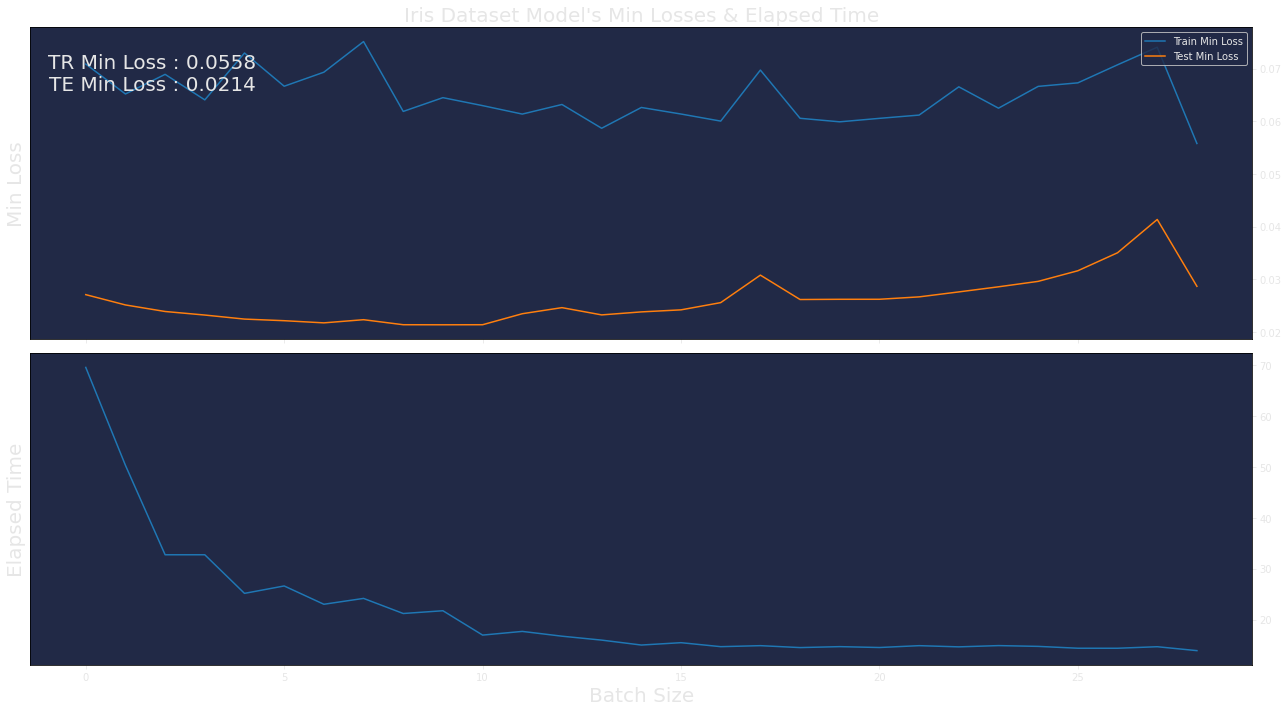

In [105]:
fig , (ax_1,ax_2) = subplots( 2, figsize = ( 18 , 10 ) , sharex = True )

ax_1.plot( l_iris_min_tr_loss )
ax_1.plot( l_iris_min_te_loss )
ax_1.set_title( 'Iris Dataset Model\'s Min Losses & Elapsed Time' , size = 20 )
ax_1.set_ylabel( 'Min Loss' , size = 20 )
text_args = dict( size = 20 , ha = 'center' , va = 'center' , transform = ax_1.transAxes ) 
ax_1.text( 0.1 , 0.85 , f'TR Min Loss : {min(l_iris_min_tr_loss):0.4f}\nTE Min Loss : {min(l_iris_min_te_loss):0.4f}' ,**text_args )
ax_1.legend( [ 'Train Min Loss' , 'Test Min Loss' ] , loc = 'upper right' )

ax_2.plot( l_iris_elapsed_time )
ax_2.set_ylabel( 'Elapsed Time' , size = 20 )
ax_2.set_xlabel( 'Batch Size' , size = 20 )

fig.tight_layout()
fig.savefig('iris_batch_plot.png')